# Random Forest Regression - Gold Price Prediction

## 1. Introduction
This notebook trains a Random Forest model to predict gold prices in Nepal based on various economic factors.

In [31]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [32]:
#Load cleaned data
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\goldprediction\data\cleaned_data.csv')
print(f"\n✓ Loaded cleaned data: {df.shape}")


✓ Loaded cleaned data: (523, 8)


In [33]:
#Prepare Features and Target
X = df[['USD_rate', 'Inflation_rate', 'gold_price_USD', 'interest_rate', 
        'festivals/weeding', 'nepse_index']]
y = df['gold_price_NPR']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (523, 6)
Target shape: (523,)


In [34]:
#Train-Test Split
#Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✓ Data split completed")
print(f"  Training set: {X_train.shape[0]} samples (80%)")
print(f"  Testing set: {X_test.shape[0]} samples (20%)")


✓ Data split completed
  Training set: 418 samples (80%)
  Testing set: 105 samples (20%)


## 2. Model Training
Training the Random Forest Regressor with optimized hyperparameters.

In [35]:
# NEW CELL - Add this after Cell 4 (train-test split)
print(f"\n{'='*40}")
print("TRAINING MULTIPLE MODELS FOR COMPARISON")
print("="*40)

# Initialize multiple models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}

# Train all models and store results
trained_models = {}
model_predictions = {}
model_metrics = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_predictions[name] = {'train': y_train_pred, 'test': y_test_pred}
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    model_metrics[name] = {
        'train_r2': train_r2,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }
    
    print(f"✓ {name} training completed!")




TRAINING MULTIPLE MODELS FOR COMPARISON

Training Random Forest...
✓ Random Forest training completed!

Training Linear Regression...
✓ Linear Regression training completed!

Training Gradient Boosting...
✓ Gradient Boosting training completed!


In [36]:
# Model comparison summary
print(f"\n{'='*40}")
print("MODEL COMPARISON SUMMARY")
print("="*40)

# Find best performing model for each metric
best_r2_model = max(models.keys(), key=lambda x: model_metrics[x]['test_r2'])
best_rmse_model = min(models.keys(), key=lambda x: model_metrics[x]['test_rmse'])
best_mae_model = min(models.keys(), key=lambda x: model_metrics[x]['test_mae'])

print(f"\nBest Performing Models:")
print(f"  Best R² Score: {best_r2_model} ({model_metrics[best_r2_model]['test_r2']:.4f})")
print(f"  Best RMSE: {best_rmse_model} ({model_metrics[best_rmse_model]['test_rmse']:.2f})")
print(f"  Best MAE: {best_mae_model} ({model_metrics[best_mae_model]['test_mae']:.2f})")

# Detailed comparison table
print(f"\n{'='*60}")
print("DETAILED PERFORMANCE METRICS")
print("="*60)
print(f"{'Model':<20} {'R² (Test)':<12} {'RMSE (Test)':<12} {'MAE (Test)':<12}")
print("-" * 60)

for name in models.keys():
    metrics = model_metrics[name]
    print(f"{name:<20} {metrics['test_r2']:<12.4f} {metrics['test_rmse']:<12.2f} {metrics['test_mae']:<12.2f}")


MODEL COMPARISON SUMMARY

Best Performing Models:
  Best R² Score: Linear Regression (0.9999)
  Best RMSE: Linear Regression (455.16)
  Best MAE: Linear Regression (384.89)

DETAILED PERFORMANCE METRICS
Model                R² (Test)    RMSE (Test)  MAE (Test)  
------------------------------------------------------------
Random Forest        0.9985       1538.23      896.03      
Linear Regression    0.9999       455.16       384.89      
Gradient Boosting    0.9996       815.70       476.01      


## 3. Model Evaluation
Evaluating model performance using various metrics.

In [37]:
# NEW CELL - Replace old evaluation cells with this
print(f"\n{'='*40}")
print("DETAILED MODEL PERFORMANCE")
print("="*40)

for name in trained_models.keys():
    metrics = model_metrics[name]
    
    print(f"\n{name.upper()}:")
    print("  Training Set:")
    print(f"    R² Score: {metrics['train_r2']:.4f}")
    print(f"    RMSE: {metrics['train_rmse']:.2f}")
    print(f"    MAE: {metrics['train_mae']:.2f}")
    print("  Testing Set:")
    print(f"    R² Score: {metrics['test_r2']:.4f}")
    print(f"    RMSE: {metrics['test_rmse']:.2f}")
    print(f"    MAE: {metrics['test_mae']:.2f}")




DETAILED MODEL PERFORMANCE

RANDOM FOREST:
  Training Set:
    R² Score: 0.9993
    RMSE: 932.83
    MAE: 532.78
  Testing Set:
    R² Score: 0.9985
    RMSE: 1538.23
    MAE: 896.03

LINEAR REGRESSION:
  Training Set:
    R² Score: 0.9998
    RMSE: 450.25
    MAE: 386.86
  Testing Set:
    R² Score: 0.9999
    RMSE: 455.16
    MAE: 384.89

GRADIENT BOOSTING:
  Training Set:
    R² Score: 1.0000
    RMSE: 20.74
    MAE: 16.32
  Testing Set:
    R² Score: 0.9996
    RMSE: 815.70
    MAE: 476.01


In [38]:
# Feature importance for tree-based models
print(f"\n{'='*40}")
print("FEATURE IMPORTANCE")
print("="*40)

for name, model in trained_models.items():
    if hasattr(model, 'feature_importances_'):
        print(f"\n{name} Feature Importance:")
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        print(importance_df.to_string(index=False))


FEATURE IMPORTANCE

Random Forest Feature Importance:
          Feature   Importance
   gold_price_USD 9.773775e-01
         USD_rate 1.361504e-02
   Inflation_rate 8.892731e-03
festivals/weeding 7.176521e-05
      nepse_index 4.290194e-05
    interest_rate 1.436643e-08

Gradient Boosting Feature Importance:
          Feature   Importance
   gold_price_USD 9.895091e-01
   Inflation_rate 7.710791e-03
         USD_rate 2.280658e-03
festivals/weeding 3.641131e-04
      nepse_index 1.353438e-04
    interest_rate 2.086817e-08


In [39]:
# NEW CELL - Replace old saving cell with this
print(f"\n{'='*40}")
print("SAVING ALL MODELS AND METRICS")
print("="*40)

# Save all models
for name, model in trained_models.items():
    filename = name.lower().replace(' ', '_') + '_gold_model.pkl'
    joblib.dump(model, f'C:\\Users\\User\\OneDrive\\Desktop\\goldprediction - Copy\\ml_models\\{filename}')
    print(f"✓ {name} saved as '{filename}'")

# Save all metrics
joblib.dump(model_metrics, r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\ml_models\all_model_comparison_metrics.pkl')
print("✓ All model comparison metrics saved!")

# Also save the best model info
best_model_info = {
    'best_r2': best_r2_model,
    'best_rmse': best_rmse_model,
    'best_mae': best_mae_model
}
joblib.dump(best_model_info, r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\ml_models\best_model_info.pkl')
print("✓ Best model information saved!")


SAVING ALL MODELS AND METRICS
✓ Random Forest saved as 'random_forest_gold_model.pkl'
✓ Linear Regression saved as 'linear_regression_gold_model.pkl'
✓ Gradient Boosting saved as 'gradient_boosting_gold_model.pkl'
✓ All model comparison metrics saved!
✓ Best model information saved!


## 4. Visualizations
Generating visualizations to understand model performance and feature importance.


GENERATING VISUALIZATIONS


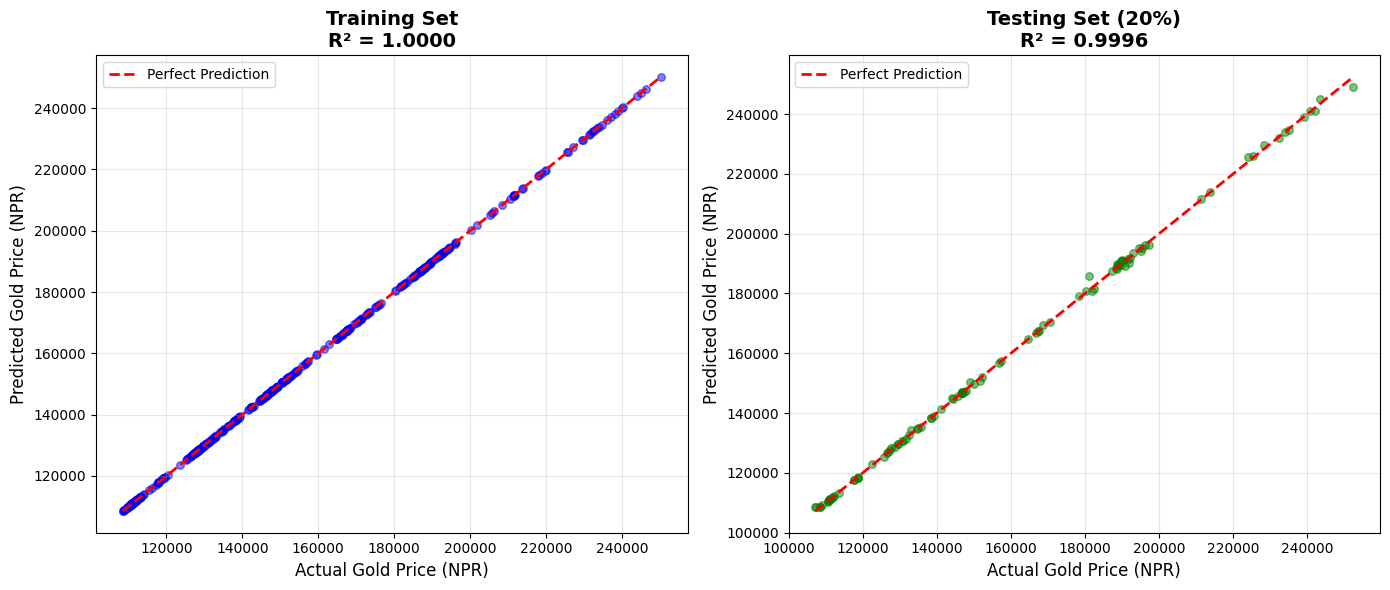

✓ Saved: model_performance.png


In [40]:
#Model Performance Visualization
print(f"\n{'='*30}")
print("GENERATING VISUALIZATIONS")
print("="*30)

#Actual vs Predicted - Training Set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, s=30, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Gold Price (NPR)', fontsize=12)
plt.ylabel('Predicted Gold Price (NPR)', fontsize=12)
plt.title(f'Training Set\nR² = {train_r2:.4f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

#Actual vs Predicted - Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=30, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Gold Price (NPR)', fontsize=12)
plt.ylabel('Predicted Gold Price (NPR)', fontsize=12)
plt.title(f'Testing Set (20%)\nR² = {test_r2:.4f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\static\images\model_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: model_performance.png")

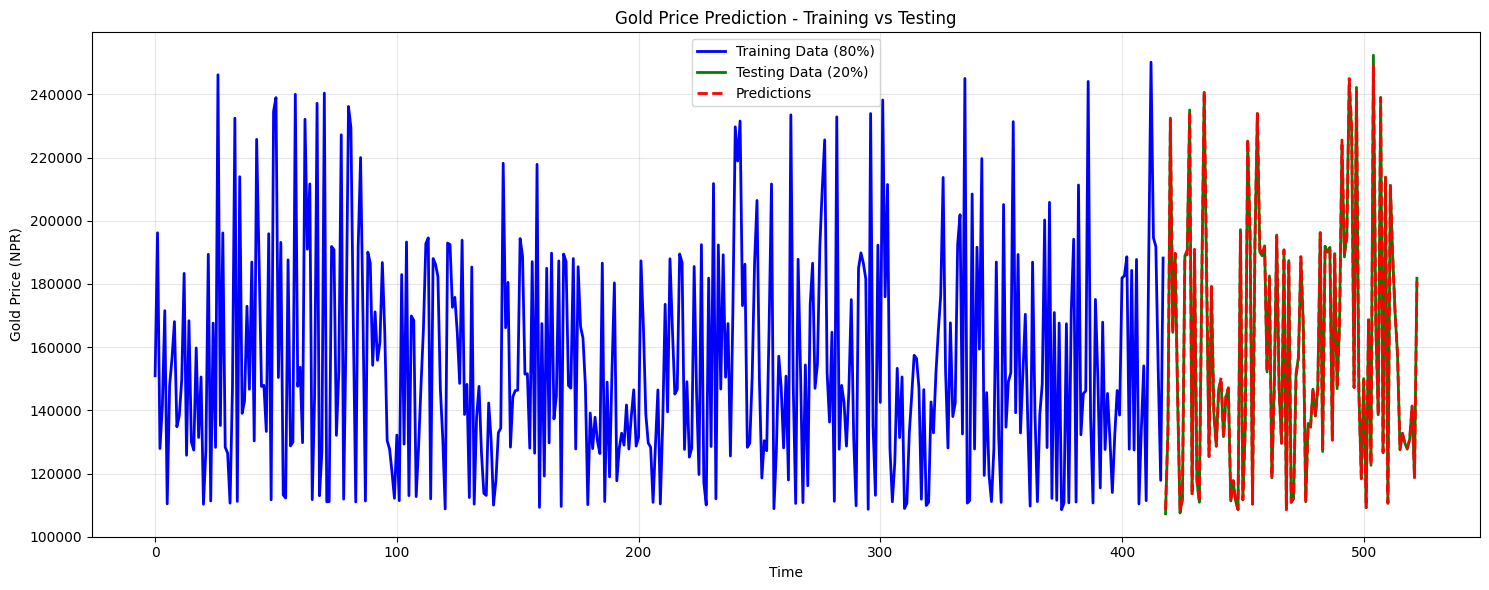

Training: 418 points
Testing: 105 points


In [41]:
# Simple Time Series Visualization
plt.figure(figsize=(15, 6))

# Plot training data
plt.plot(range(len(y_train)), y_train.values, label='Training Data (80%)', color='blue', linewidth=2)

# Plot testing data and predictions
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test.values, label='Testing Data (20%)', color='green', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, label='Predictions', color='red', linewidth=2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Gold Price (NPR)')
plt.title('Gold Price Prediction - Training vs Testing')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\static\images\train_test_split.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Training: {len(y_train)} points")
print(f"Testing: {len(y_test)} points")

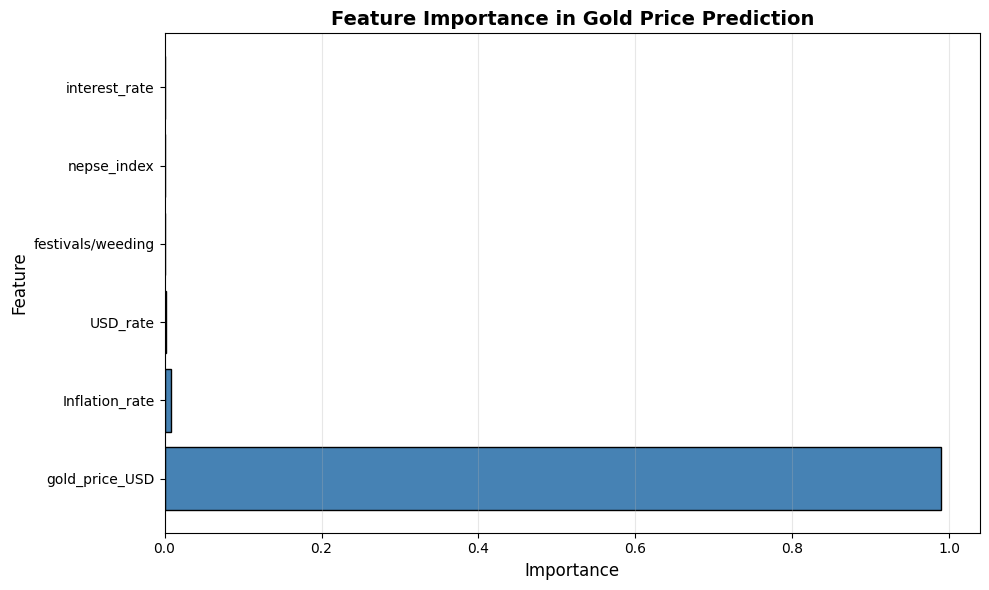

✓ Saved: feature_importance.png


In [42]:
#Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], 
         color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Gold Price Prediction', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\static\images\feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: feature_importance.png")

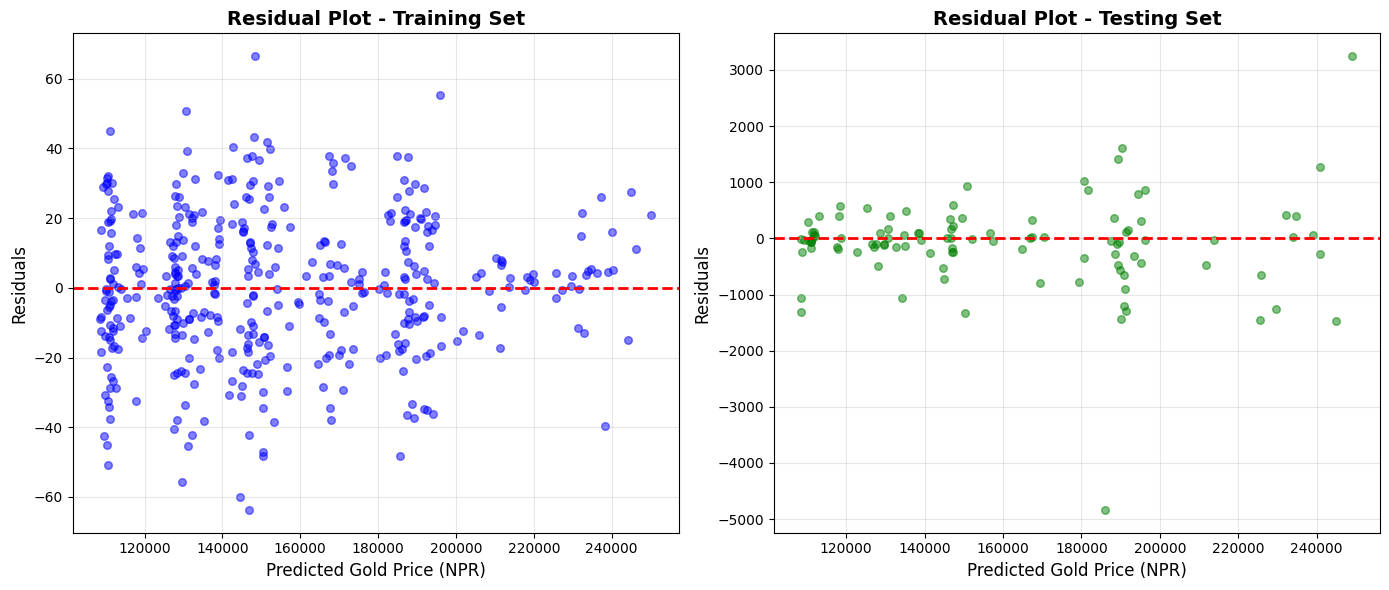

✓ Saved: residual_plots.png


In [43]:
#Residual Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.5, s=30, color='blue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Gold Price (NPR)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.5, s=30, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Gold Price (NPR)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot - Testing Set', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:\Users\User\OneDrive\Desktop\goldprediction - Copy\static\images\residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: residual_plots.png")

## 5. Conclusion
Summary of model training results and performance.

In [44]:
#Final Summary
print(f"\n{'='*40}")
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*40)
print(f"\n✓ Model accuracy (R²): {test_r2*100:.2f}%")
print(f"✓ Average prediction error (MAE): NPR {test_mae:.2f}")
print(f"✓ All files saved successfully!")


MODEL TRAINING COMPLETED SUCCESSFULLY!

✓ Model accuracy (R²): 99.96%
✓ Average prediction error (MAE): NPR 476.01
✓ All files saved successfully!
